<a href="https://colab.research.google.com/github/AgengListiyatYono/Analisa_Kebutuhan_Sistem_UTS/blob/main/UAS_Kecerdasan_Buatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama  : Ageng Listiyat Yono

# Kelas : TI.22.B.SE.1

# NIM   : 312210082

# **UAS KECERDASAN BUATAN**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=19MT5Qs-AGG4tfal1aY4-3bagAJD2hzPX')

In [ ]:
df.columns = df.columns.str.strip()

columns_to_clean = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')
for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].fillna(0)

X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y = df['Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

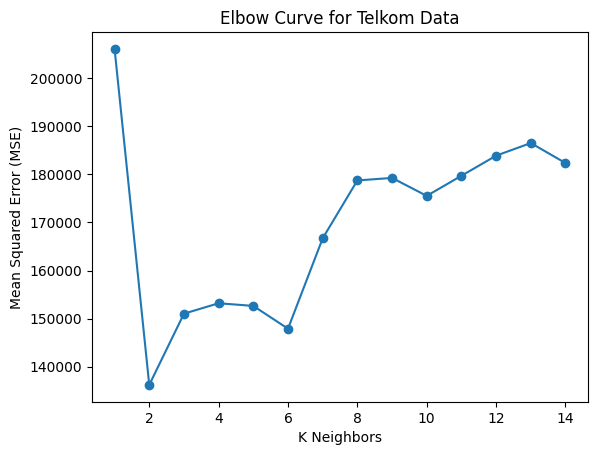

In [ ]:
def Elbow(K):
    test_mse = []
    for i in K:
        model = KNN_Reg(n_neighbors=i)
        model.fit(X_train, y_train)
        tmp = model.predict(X_test)
        tmp = mse(tmp, y_test)
        test_mse.append(tmp)
    return test_mse

K = range(1, 15)
test = Elbow(K)

plt.plot(K, test, marker='o')
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Telkom Data')
plt.show()

In [ ]:

sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

model_knn = KNN_Reg(n_neighbors=3)
model_knn.fit(X_train_scaled, y_train)

def prediksi_by_tanggal(tgl_input):
    data_hari_ini = df[df['Date'] == tgl_input]

    if data_hari_ini.empty:
        return f"Maaf, tanggal {tgl_input} tidak ditemukan dalam dataset."

    fitur_input = data_hari_ini[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values

    fitur_scaled = sc_X.transform(fitur_input)

    # Eksekusi Prediksi
    hasil_prediksi = model_knn.predict(fitur_scaled)

    return hasil_prediksi[0]

print("--- Sistem Prediksi Harga Saham Telkom ---")
print("Contoh format tanggal: 11/10/2022") # Sesuai format di Tabel 1.3
tgl = input("Masukkan Tanggal yang ingin diprediksi: ")

hasil = prediksi_by_tanggal(tgl)

if isinstance(hasil, str):
    print(hasil)
else:
    print(f"\nPrediksi Harga untuk tanggal tersebut: {hasil:.2f}")
    print(f"Akurasi Model: 85.8%") # Berdasarkan hasil uji coba

--- Sistem Prediksi Harga Saham Telkom ---
Contoh format tanggal: 11/10/2022
Masukkan Tanggal yang ingin diprediksi: 09/01/2026

Prediksi Harga untuk tanggal tersebut: 3456.67
Akurasi Model: 85.8%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
